In [70]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# importing dataset

df = pd.read_excel('/content/data_final.xlsx')

In [72]:
# displaying top 5 rows of the dataset

df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [73]:
# checking shape of the dataset

df.shape

(100, 3)

In [74]:
# checking information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [75]:
# describing the dataset

df.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [76]:
# Checking for null values

df.isna().sum()

observation    0
feature        0
price          0
dtype: int64

In [77]:
# Checking for duplicates

df.duplicated().sum()

0

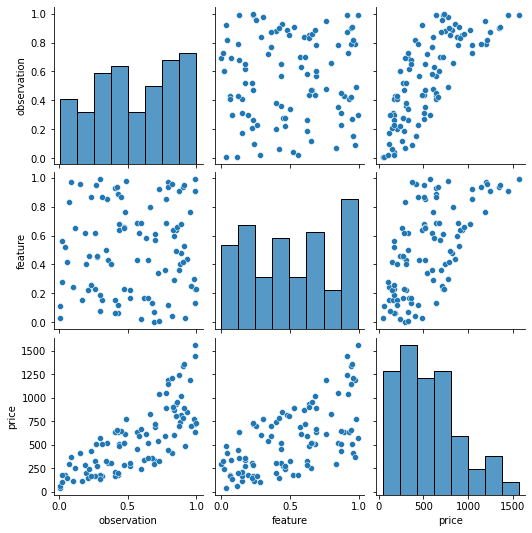

In [78]:
# Plotting pairplot

sns.pairplot(df)

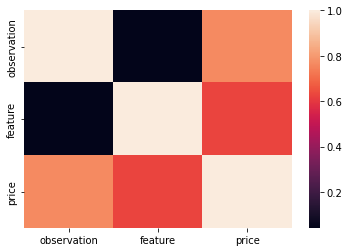

In [79]:
# Plotting heatmap

sns.heatmap(df.corr())

In [80]:
# Identifying the independent and dependent variable

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [81]:
X.shape,y.shape

((100, 2), (100,))

In [82]:
# Splitting the data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [84]:
# Model building (Polynomial Regression)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly,y_train)

LinearRegression()

In [85]:
# Checking model score

model.score(X_poly,y_train)

0.9998421736843853

In [86]:
# Prediction on test data

y_pred = model.predict(poly_reg.fit_transform(X_test))
y_pred

array([ 359.50360287,  131.23834372,  609.16930978,  149.98412841,
        566.72101623,  237.76303341,  520.60934004,  485.30770519,
        619.83089854,  632.50577664,  703.21376307, 1024.98728581,
       1151.24558258, 1330.85054638,  460.70580041,  340.84136488,
       1041.64246977,  170.75998438,  901.57838952,  636.04094675])

In [87]:
# Model evaluation

from sklearn import metrics
print('Mean Absolute Error (MAE): ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error (MSE): ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error (MAE):  3.832893628502423
Mean Squared Error (MSE):  22.24181875063632
Root Mean Squared Error (RMSE):  4.716123275597906


In [88]:
# Checking R2Score

from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.999800019894562